# What are the most demanded skills for the top 3 most popular data roles?

#### Methodology

1. Cleanup skills Column
2. Count of skills for Job Title
3. Calculate Skill Percentage 
4. Plot on single graph.

### Importing Data and Libraries 

In [117]:
#Importing Essential Modules and Libraries
import ast
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import seaborn as sns


#loading Data

df=load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Selecting Data for a Country 

In [118]:
selected_country='India'
df_sel=df[df['job_country']==selected_country]



#### Top Job Titles for Selected Country

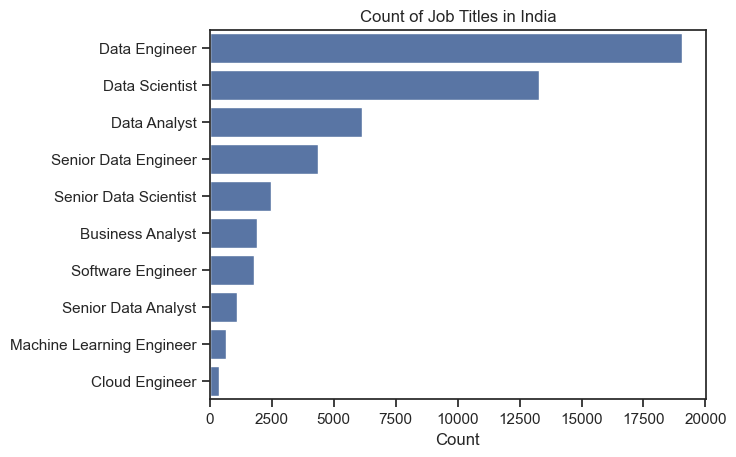

In [119]:
job_counts = df_sel['job_title_short'].value_counts()
job_counts_sorted = job_counts.sort_values(ascending=False)
sns.set_theme(style='ticks')
sns.barplot(x=job_counts_sorted.values, y=job_counts_sorted.index)
plt.xlabel('Count')
plt.ylabel('')
plt.title(f'Count of Job Titles in {selected_country}')
plt.show()


#### Exploding Skills from list
We wil explode skills and make a data frame for job title and skills.

In [120]:
df_sel_exp=df_sel[['job_title_short','job_skills']].explode('job_skills')

#### Count of Skills for Job Titles

We will be taking top no_of_title {3 by default} titles for graph

In [121]:
no_of_title=3 # no of titles
df_sel_grp=df_sel_exp.groupby(['job_skills','job_title_short']).size()
df_sel_grp=df_sel_grp.reset_index(name='skills_count')
df_sel_grp.sort_values(by='skills_count',ascending =False, inplace=True)
title_list=df_sel_grp['job_title_short'].unique().tolist()
title_list=sorted(title_list[:no_of_title])


#### Plotting the Graph

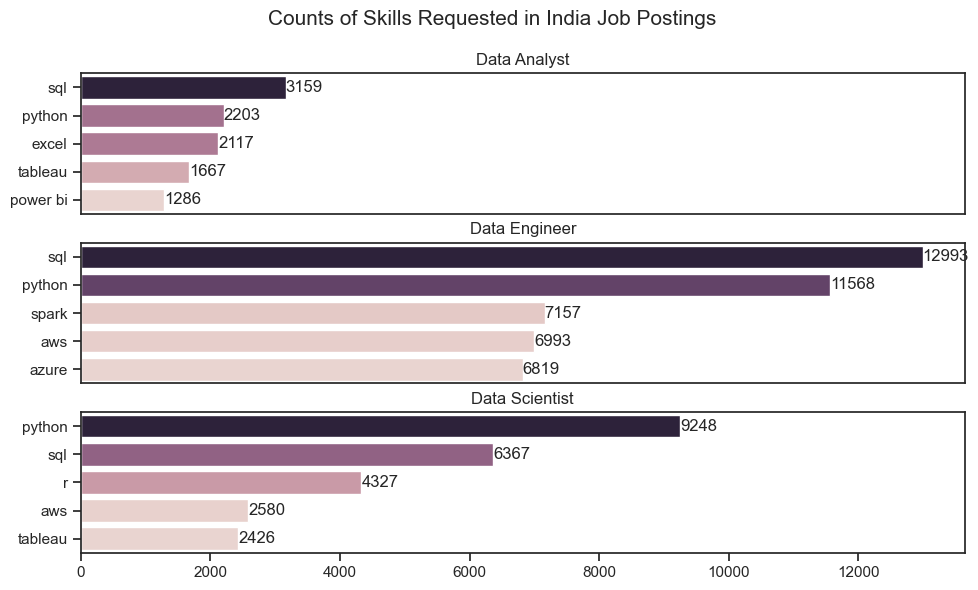

In [122]:
fig, ax = plt.subplots(no_of_title,1)
fig.set_size_inches((10, no_of_title*2))
grp_xlim =df_sel_grp.iloc[0]['skills_count']
grp_xlim=grp_xlim*1.05
sns.set_theme(style='ticks')
for i,title in enumerate(title_list):
    df_plot=df_sel_grp[df_sel_grp['job_title_short']==title].head(5)
    sns.barplot(data=df_plot,x='skills_count',y='job_skills',ax=ax[i],hue='skills_count',legend=False)
    ax[i].set_title(title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,grp_xlim)

    if i != len(title_list)-1:
        ax[i].set_xticks([])

    for n,v in enumerate(df_plot['skills_count']):
        ax[i].text(v+1,n,f"{v}", va='center')

fig.suptitle(f'Counts of Skills Requested in {selected_country} Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

#### Calculating Percentage of Skills

In [123]:
job_counts=job_counts.reset_index(name='jobs_total')


In [124]:
df_skill_per=pd.merge(df_sel_grp,job_counts,how='left',on='job_title_short')
df_skill_per['skill_per']=100*df_skill_per['skills_count']/df_skill_per['jobs_total']

#### Plotting Graph for Skills Percentage

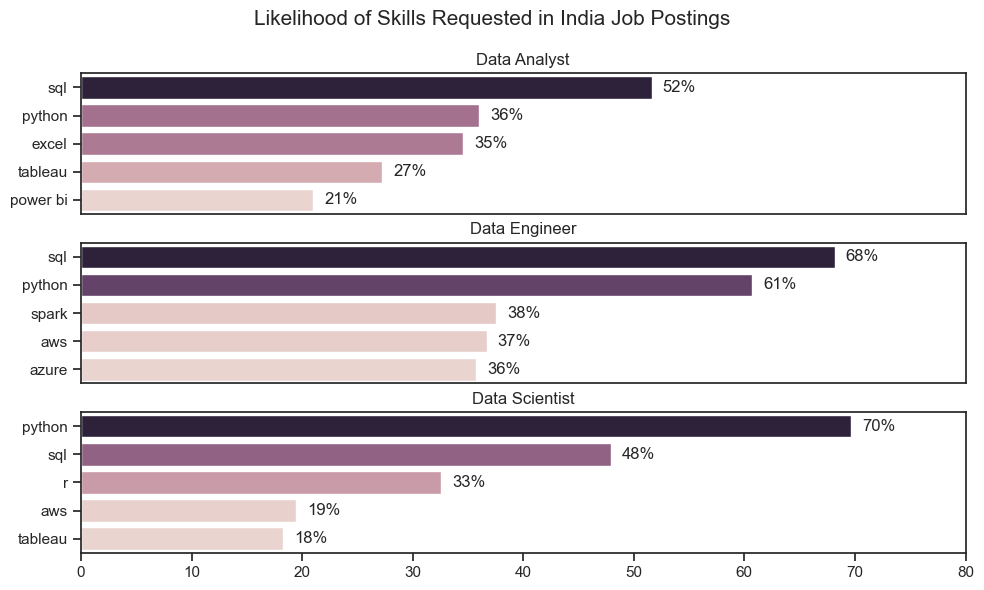

In [125]:
fig, ax = plt.subplots(no_of_title,1)
fig.set_size_inches((10, no_of_title*2))
sns.set_theme(style='ticks')
for i,title in enumerate(title_list):
    df_plot=df_skill_per[df_skill_per['job_title_short']==title].head(5)
    sns.barplot(data=df_plot,x='skill_per',y='job_skills',ax=ax[i],hue='skill_per',legend=False)
    ax[i].set_title(title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,80)

    if i != len(title_list) -1:
        ax[i].set_xticks([])

    for n,v in enumerate(df_plot['skill_per']):
        ax[i].text(v+1,n,f"{v:.0f}%", va='center')

fig.suptitle(f'Likelihood of Skills Requested in {selected_country} Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()